# PCA – Principal Component Analysis

### What is PCA?
- A Dimensionality Reduction technique.

- It reduces the number of features (columns) while keeping the most important information.

- Helps in:

    - Visualization (turn 100 features into 2D/3D for plotting).

    - Speeding up ML models.

    - Removing noise/redundant data.

Example: Imagine you have a dataset with 100 questions about a student. Many overlap (marks in Math, Algebra, Geometry are related). PCA can reduce them to just a few main scores without losing the big picture.

#### Key Idea

PCA finds new axes (directions) in the data called Principal Components.

The first component captures the maximum variation in the data.

The second component captures the next highest variation (independent of the first), and so on.

You then keep only the top components (say 2 or 3) instead of all features.

columns -> score (that columns provide info)
a -> 0.9
b -> 0.4
c -> 0.75
d -> 0.43
e -> 0.67
f -> 0.87
g -> 0.91


taking out only high score (important info alone)
g, a, f

#### How PCA Works?
- Standardize the data (make all features on same scale).
- Find covariance matrix (how features vary together).
- Find eigenvectors & eigenvalues of the covariance matrix.
    - Eigenvectors = new directions (principal components).
    - Eigenvalues = importance (variance captured).
- Sort components by eigenvalues (largest first).
- Project data onto top components → reduced dataset.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits

# Load sample dataset (handwritten digits 0–9)
digits = load_digits()
X = digits.data  # 64 features (8x8 pixels)
y = digits.target

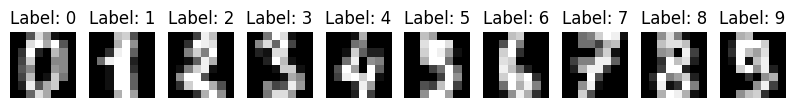

In [8]:
# Show first 10 digit images
fig, axes = plt.subplots(1, 10, figsize=(10, 3))
for i in range(10):
    axes[i].imshow(digits.images[i], cmap="gray")
    axes[i].set_title(f"Label: {y[i]}")
    axes[i].axis("off")

plt.show()


In [4]:
# Apply PCA to reduce dimensions to 2
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

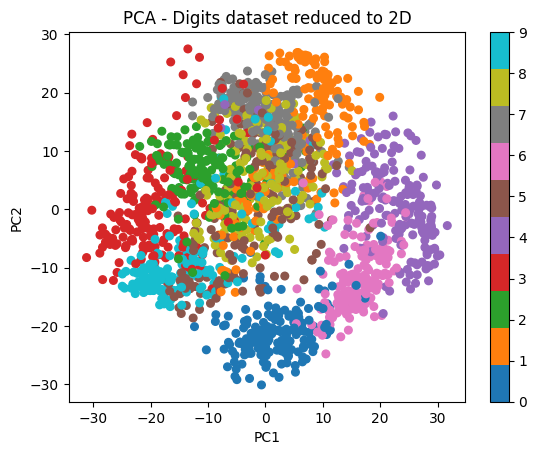

In [5]:
# Plot results
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap="tab10", s=30)
plt.title("PCA - Digits dataset reduced to 2D")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar()
plt.show()

In [6]:
print("Original shape:", X.shape)
print("Reduced shape:", X_reduced.shape)

Original shape: (1797, 64)
Reduced shape: (1797, 2)


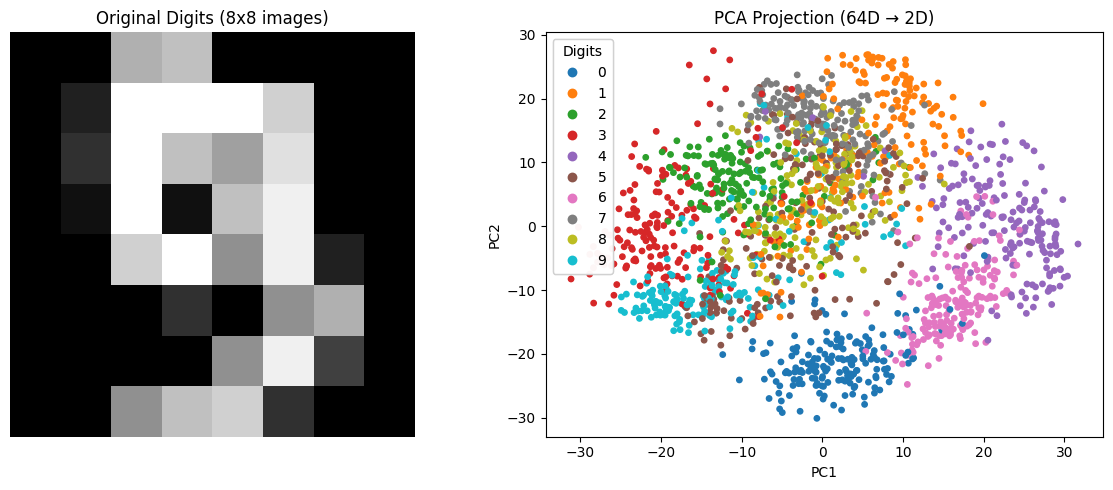

In [9]:
# Side-by-side visualization
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# LEFT: Show some original digit images
for i in range(10):
    axes[0].imshow(digits.images[i], cmap="gray")
    axes[0].set_title("Original Digits (8x8 images)")
    axes[0].axis("off")

# RIGHT: Show PCA-reduced 2D scatter plot
scatter = axes[1].scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap="tab10", s=15)
axes[1].set_title("PCA Projection (64D → 2D)")
axes[1].set_xlabel("PC1")
axes[1].set_ylabel("PC2")

# Add color legend
legend = axes[1].legend(*scatter.legend_elements(), title="Digits")
axes[1].add_artist(legend)

plt.tight_layout()
plt.show()

In [10]:
import pandas as pd
from sklearn.datasets import load_digits

# Load dataset
digits = load_digits()
X = digits.data      # Features (64 pixels for each image)
y = digits.target    # Labels (digit 0–9)

# Convert to DataFrame for easier viewing
df = pd.DataFrame(X)
df['label'] = y

# Show first 10 rows
print(df.head(10))


     0    1     2     3     4     5     6    7    8    9  ...   55   56   57  \
0  0.0  0.0   5.0  13.0   9.0   1.0   0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1  0.0  0.0   0.0  12.0  13.0   5.0   0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2  0.0  0.0   0.0   4.0  15.0  12.0   0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3  0.0  0.0   7.0  15.0  13.0   1.0   0.0  0.0  0.0  8.0  ...  0.0  0.0  0.0   
4  0.0  0.0   0.0   1.0  11.0   0.0   0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
5  0.0  0.0  12.0  10.0   0.0   0.0   0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
6  0.0  0.0   0.0  12.0  13.0   0.0   0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
7  0.0  0.0   7.0   8.0  13.0  16.0  15.0  1.0  0.0  0.0  ...  0.0  0.0  0.0   
8  0.0  0.0   9.0  14.0   8.0   1.0   0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
9  0.0  0.0  11.0  12.0   0.0   0.0   0.0  0.0  0.0  2.0  ...  0.0  0.0  0.0   

     58    59    60    61   62   63  label  
0   6.0  13.0  10.0   0.0  0.0  0.0      0  
1   0.0  11.0  16.0  10.0  0.